# 분류모델

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [1]:
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline

In [21]:
import seaborn as sns

In [36]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if  platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system...Sorry')

In [4]:
test_set = pd.read_csv('C:.../test_set.csv', encoding='euc-kr',engine='python')
#데이터가 저장되어있는 폴더에서 파일불러오기 

In [5]:
train_set = pd.read_csv('C:.../5train_set2.csv', encoding='euc-kr',engine='python')

In [6]:
del test_set['Unnamed: 0']
del train_set['Unnamed: 0']

In [7]:
test_set.head()

,풍속,풍향,gust,기압,습도,기온,수온,최대파고,유의파고,평균파고,파주기,파향,label
0,15.4,352.0,22.6,1010.6,81.0,5.4,14.7,12.7,8.0,4.0,6.4,16.0,0
1,7.0,211.0,7.9,1000.8,93.0,20.1,18.7,1.1,0.7,0.5,3.8,340.0,0
2,5.7,306.0,7.4,1019.0,97.0,7.0,6.2,0.6,0.3,0.2,3.6,274.0,0
3,5.7,185.0,6.9,1008.2,93.0,12.2,10.3,0.5,0.3,0.2,3.6,284.0,0
4,2.5,8.0,3.3,1018.0,97.0,16.1,17.0,0.8,0.5,0.2,4.3,289.0,0


In [8]:
train_set.head()

,풍속,풍향,gust,기압,습도,기온,수온,최대파고,유의파고,평균파고,파주기,파향,label
0,11.5,6.0,18.0,1015.5,84.0,-2.5,8.0,3.6,2.4,1.7,6.4,131.0,0
1,9.2,357.0,12.0,1020.1,91.0,4.5,13.1,2.3,1.5,1.0,10.7,266.0,0
2,4.2,31.0,5.4,1012.7,87.0,25.2,26.5,2.3,1.4,1.0,5.8,161.0,0
3,4.8,262.0,5.8,1008.5,89.0,20.0,19.0,0.6,0.4,0.3,2.3,218.0,0
4,12.7,29.0,15.9,1021.2,75.0,10.2,15.1,1.8,1.0,0.7,4.3,202.0,0


## 로지스틱 회귀

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
#컬럼 자르고 정규화하기
label_tr = train_set['label']
x_tr= train_set.iloc[:,0:12]
x_tr.head()

,풍속,풍향,gust,기압,습도,기온,수온,최대파고,유의파고,평균파고,파주기,파향
0,11.5,6.0,18.0,1015.5,84.0,-2.5,8.0,3.6,2.4,1.7,6.4,131.0
1,9.2,357.0,12.0,1020.1,91.0,4.5,13.1,2.3,1.5,1.0,10.7,266.0
2,4.2,31.0,5.4,1012.7,87.0,25.2,26.5,2.3,1.4,1.0,5.8,161.0
3,4.8,262.0,5.8,1008.5,89.0,20.0,19.0,0.6,0.4,0.3,2.3,218.0
4,12.7,29.0,15.9,1021.2,75.0,10.2,15.1,1.8,1.0,0.7,4.3,202.0


In [45]:
#컬럼 자르고 정규화하기
label_t = test_set['label']
x_t = test_set.iloc[:,0:12]
x_t.head()

,풍속,풍향,gust,기압,습도,기온,수온,최대파고,유의파고,평균파고,파주기,파향
0,15.4,352.0,22.6,1010.6,81.0,5.4,14.7,12.7,8.0,4.0,6.4,16.0
1,7.0,211.0,7.9,1000.8,93.0,20.1,18.7,1.1,0.7,0.5,3.8,340.0
2,5.7,306.0,7.4,1019.0,97.0,7.0,6.2,0.6,0.3,0.2,3.6,274.0
3,5.7,185.0,6.9,1008.2,93.0,12.2,10.3,0.5,0.3,0.2,3.6,284.0
4,2.5,8.0,3.3,1018.0,97.0,16.1,17.0,0.8,0.5,0.2,4.3,289.0


In [46]:
log_clf = LogisticRegression() 
log_clf.fit(x_tr,label_tr) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
#데이터 예측하기
log_pred = log_clf.predict(x_t)

In [48]:
#데이터 검증
print("\n *Confusion Matrix* \n")
print(confusion_matrix(label_t, log_pred))
print("\n *Classification Report* \n")
print(metrics.classification_report(label_t, log_pred))


 *Confusion Matrix* 

[[107196  49710]
 [    38     64]]

 *Classification Report* 

             precision    recall  f1-score   support

          0       1.00      0.68      0.81    156906
          1       0.00      0.63      0.00       102

avg / total       1.00      0.68      0.81    157008



###### ROC 확인하기

In [49]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(label_t, log_clf.decision_function(x_t))
fpr, tpr, thresholds

(array([0.00000000e+00, 6.37324258e-06, 3.69648070e-04, 3.69648070e-04,
        5.09859406e-04, 5.09859406e-04, 6.11831288e-04, 6.11831288e-04,
        6.11831288e-04, 1.01334557e-03, 1.01334557e-03, 1.28102176e-03,
        1.28102176e-03, 1.88010656e-03, 1.88010656e-03, 2.08405032e-03,
        2.08405032e-03, 3.51802990e-03, 3.51802990e-03, 3.56901584e-03,
        3.56901584e-03, 3.60088206e-03, 3.60088206e-03, 3.65824124e-03,
        3.65824124e-03, 4.02788931e-03, 4.02788931e-03, 4.72257275e-03,
        4.72257275e-03, 5.44274916e-03, 5.44274916e-03, 6.95320765e-03,
        6.95320765e-03, 8.20873644e-03, 8.20873644e-03, 8.65486342e-03,
        8.65486342e-03, 8.80782124e-03, 8.80782124e-03, 1.00251106e-02,
        1.00251106e-02, 1.00952162e-02, 1.00952162e-02, 1.10257097e-02,
        1.10257097e-02, 1.14973296e-02, 1.14973296e-02, 1.20263087e-02,
        1.20263087e-02, 1.56335640e-02, 1.56335640e-02, 1.70739169e-02,
        1.70739169e-02, 1.93236715e-02, 1.93236715e-02, 2.797216

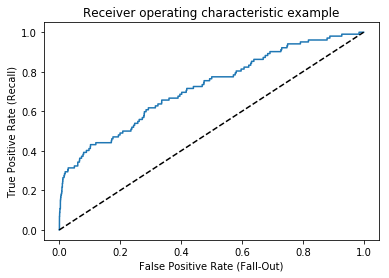

In [50]:
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

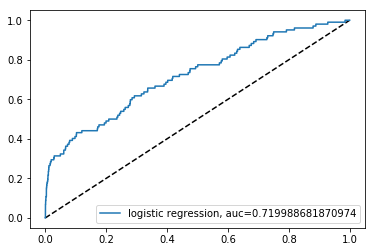

In [58]:
log_proba = log_clf.predict_proba(x_t)[::,1]
fpr_log, tpr_log, _ = metrics.roc_curve(label_t,  log_proba)
auc_log = metrics.roc_auc_score(label_t, log_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log,tpr_log,label="logistic regression, auc="+str(auc_log))
plt.legend(loc=4)
plt.show()


In [59]:
p = log_clf.predict_proba(x_t)

In [60]:
p

array([[0.04487752, 0.95512248],
       [0.3372822 , 0.6627178 ],
       [0.29491175, 0.70508825],
       ...,
       [0.32041276, 0.67958724],
       [0.42520764, 0.57479236],
       [0.54324095, 0.45675905]])

In [61]:
p[3]

array([0.38277541, 0.61722459])

In [62]:
count_A = 0
count_B = 0
count_C = 0
count_D = 0
count_E = 0



for i in range(0, len(p)):
    if 0.80< p[i][1]:
        count_A +=1
    elif 0.6 < p[i][1] <0.8:
        count_B += 1
    elif 0.4 < p[i][1] <0.6:
        count_C += 1   
    elif 0.2 < p[i][1] <0.4:
        count_D += 1
    elif p[i][1] < 0.2:
        count_E += 1
        
print(count_A)
print(count_B)
print(count_C)
print(count_D)
print(count_E)

4039
22257
53152
55655
21905


In [63]:
A = count_A/len(p)
B = count_B/len(p)
C = count_C/len(p)
D = count_D/len(p)
E = count_E/len(p)

In [64]:
print(A)
print(B)
print(C)
print(D)
print(E)

0.02572480383165189
0.14175710791806787
0.3385305207377968
0.3544723835728116
0.13951518393967186


###### feature data  가중치 확인

In [65]:
dfcoef = pd.DataFrame({'coef':x_tr.columns, 'weight':log_clf.coef_[0]})
dfcoef

,coef,weight
0,풍속,-0.108340
1,풍향,0.001599
2,gust,0.209335
3,기압,-0.004258
4,습도,0.043466
5,기온,0.042092
6,수온,-0.050997
7,최대파고,-0.282128
8,유의파고,-0.012687
9,평균파고,1.292128


In [66]:
log_clf.coef_

array([[-1.08340401e-01,  1.59947741e-03,  2.09335491e-01,
        -4.25836428e-03,  4.34658231e-02,  4.20917745e-02,
        -5.09973652e-02, -2.82128496e-01, -1.26867683e-02,
         1.29212758e+00, -1.44901203e-01, -5.78569896e-04]])

In [ ]:
#coef(편회귀계수)의 값이 양수이면 그 컬럼의 값이 커질수록 목적변수가 TRUE일 확률 즉, admit=1일 확률이 높아진다.
#반대로 coef의 값이 음수이면 그 컬럼의 값이 커질수록 목적변수가 FALSE일 확률 즉, admin=0일 확률이 높아진다.

#평균파고가 가장 많은 영향을끼쳤고 

In [67]:
log_clf.intercept_

array([0.19012407])

In [68]:
train_set.describe()

,풍속,풍향,gust,기압,습도,기온,수온,최대파고,유의파고,평균파고,파주기,파향,label
count,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000
mean,6.852124,189.428105,9.268137,1013.742810,77.526144,15.343301,17.284477,2.208170,1.393464,0.906536,5.754902,195.150000,0.500000
std,4.423451,114.093293,5.951411,9.485601,15.201784,8.040306,5.987721,2.216564,1.474427,0.988472,2.409785,97.201919,0.500409
min,0.000000,0.000000,0.000000,976.700000,33.000000,-11.400000,1.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,3.300000,81.750000,4.575000,1007.950000,66.000000,9.175000,12.975000,0.900000,0.500000,0.300000,4.000000,115.750000,0.000000
50%,6.000000,200.000000,8.000000,1013.950000,80.000000,16.300000,17.100000,1.500000,1.000000,0.600000,5.300000,204.500000,0.500000
75%,9.800000,294.250000,13.000000,1020.500000,90.000000,21.925000,22.025000,2.800000,1.800000,1.100000,7.100000,270.000000,1.000000
max,26.800000,360.000000,40.400000,1035.700000,100.000000,33.300000,31.700000,13.700000,11.500000,8.200000,12.800000,360.000000,1.000000


In [69]:
train_set.std() 

풍속         4.423451
풍향       114.093293
gust       5.951411
기압         9.485601
습도        15.201784
기온         8.040306
수온         5.987721
최대파고       2.216564
유의파고       1.474427
평균파고       0.988472
파주기        2.409785
파향        97.201919
label      0.500409
dtype: float64

##  decision Tree

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [145]:
dtc = DecisionTreeClassifier()
dtc.fit(x_tr,label_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [146]:
#데이터 예측하기
dtc_pred = dtc.predict(x_t)

In [147]:
#데이터 검증
print("\n *Confusion Matrix* \n")
print(confusion_matrix(label_t, dtc_pred))
print("\n *Classification Report* \n")
print(metrics.classification_report(label_t, dtc_pred))


 *Confusion Matrix* 

[[93609 63297]
 [   36    66]]

 *Classification Report* 

             precision    recall  f1-score   support

          0       1.00      0.60      0.75    156906
          1       0.00      0.65      0.00       102

avg / total       1.00      0.60      0.75    157008



In [148]:
p = dtc.predict_proba(x_t)

In [149]:
p

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

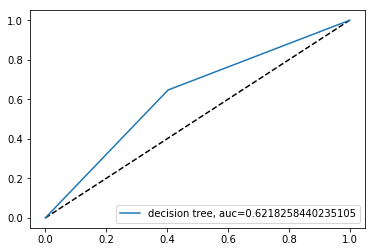

In [150]:
dtc_proba = dtc.predict_proba(x_t)[::,1]
fpr_dtc, tpr_dtc, _ = metrics.roc_curve(label_t,  dtc_proba)
auc_dtc = metrics.roc_auc_score(label_t, dtc_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dtc,tpr_dtc,label="decision tree, auc="+str(auc_dtc))
plt.legend(loc=4)
plt.show()


## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
#데이터 학습시키기
rdc = RandomForestClassifier(n_estimators=100, oob_score='Ture')
rdc.fit(x_tr, label_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score='Ture', random_state=None, verbose=0,
            warm_start=False)

In [168]:
#데이터 예측하기
rdc_pred = rdc.predict(x_t)

In [169]:
#데이터 검증
print("\n *Confusion Matrix* \n")
print(confusion_matrix(label_t, rdc_pred))
print("\n *Classification Report* \n")
print(metrics.classification_report(label_t, rdc_pred))

# 51 61


 *Confusion Matrix* 

[[109168  47738]
 [    28     74]]

 *Classification Report* 

             precision    recall  f1-score   support

          0       1.00      0.70      0.82    156906
          1       0.00      0.73      0.00       102

avg / total       1.00      0.70      0.82    157008



In [172]:
rdc.oob_decision_function_

array([[0.4       , 0.6       ],
       [0.4375    , 0.5625    ],
       [0.75757576, 0.24242424],
       ...,
       [0.43589744, 0.56410256],
       [0.25641026, 0.74358974],
       [0.8       , 0.2       ]])

In [157]:
p = rdc.predict_proba(x_t)

In [158]:
p

array([[0.08, 0.92],
       [0.5 , 0.5 ],
       [0.34, 0.66],
       ...,
       [0.35, 0.65],
       [0.18, 0.82],
       [0.34, 0.66]])

In [159]:
p[3]

array([0.23, 0.77])

In [102]:
x_t.head()

,풍속,풍향,gust,기압,습도,기온,수온,최대파고,유의파고,평균파고,파주기,파향
0,15.4,352.0,22.6,1010.6,81.0,5.4,14.7,12.7,8.0,4.0,6.4,16.0
1,7.0,211.0,7.9,1000.8,93.0,20.1,18.7,1.1,0.7,0.5,3.8,340.0
2,5.7,306.0,7.4,1019.0,97.0,7.0,6.2,0.6,0.3,0.2,3.6,274.0
3,5.7,185.0,6.9,1008.2,93.0,12.2,10.3,0.5,0.3,0.2,3.6,284.0
4,2.5,8.0,3.3,1018.0,97.0,16.1,17.0,0.8,0.5,0.2,4.3,289.0


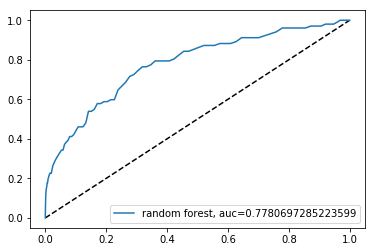

In [103]:
rdc_proba = rdc.predict_proba(x_t)[::,1]
fpr_rdc, tpr_rdc, _ = metrics.roc_curve(label_t,  rdc_proba)
plt.plot([0, 1], [0, 1], 'k--',)
auc_rdc = metrics.roc_auc_score(label_t, rdc_proba)
plt.plot(fpr_rdc,tpr_rdc,label="random forest, auc="+str(auc_rdc))
plt.legend(loc=4)
plt.show()


In [160]:
count_A = 0
count_B = 0
count_C = 0
count_D = 0
count_E = 0



for i in range(0, len(p)):
    if 0.80< p[i][1]:
        count_A +=1
    elif 0.6 < p[i][1] <0.8:
        count_B += 1
    elif 0.4 < p[i][1] <0.6:
        count_C += 1   
    elif 0.2 < p[i][1] <0.4:
        count_D += 1
    elif p[i][1] < 0.2:
        count_E += 1
        
print(count_A)
print(count_B)
print(count_C)
print(count_D)
print(count_E)

6462
21478
41162
54230
25834


In [161]:
print(A)
print(B)
print(C)
print(D)
print(E)

0.01622210333231428
0.13533705288902476
0.35470167125242025
0.36782839091001734
0.12591078161622338


## Navie Bayes

In [104]:
from sklearn.naive_bayes import GaussianNB

In [108]:
nb = GaussianNB()
nb.fit(x_tr,label_tr)

GaussianNB(priors=None)

In [109]:
nb_pred = nb.predict(x_t)

In [110]:
#데이터 검증
print("\n *Confusion Matrix* \n")
print(confusion_matrix(label_t, nb_pred))
print("\n *Classification Report* \n")
print(metrics.classification_report(label_t, nb_pred))

# 51 61


 *Confusion Matrix* 

[[139579  17327]
 [    60     42]]

 *Classification Report* 

             precision    recall  f1-score   support

          0       1.00      0.89      0.94    156906
          1       0.00      0.41      0.00       102

avg / total       1.00      0.89      0.94    157008



In [111]:
p = nb.predict_proba(x_t)

In [112]:
p

array([[6.35331657e-49, 1.00000000e+00],
       [9.23219227e-01, 7.67807735e-02],
       [9.79914776e-01, 2.00852240e-02],
       ...,
       [8.59506410e-01, 1.40493590e-01],
       [7.42210000e-03, 9.92577900e-01],
       [1.52398724e-02, 9.84760128e-01]])

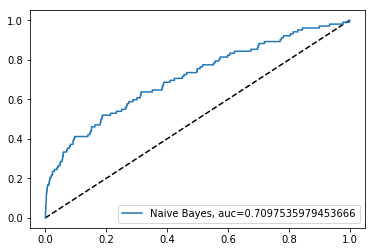

In [113]:
nb_proba = nb.predict_proba(x_t)[::,1]
fpr_nb, tpr_nb, _ = metrics.roc_curve(label_t,  nb_proba)
plt.plot([0, 1], [0, 1], 'k--', )
auc_nb = metrics.roc_auc_score(label_t, nb_proba)
plt.plot(fpr_nb,tpr_nb,label="Naive Bayes, auc="+str(auc_nb))
plt.legend(loc=4)
plt.show()


## QDA

In [114]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_tr, label_tr)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [115]:
qda_pred = qda.predict(x_t)

In [116]:
#데이터 검증
print("\n *Confusion Matrix* \n")
print(confusion_matrix(label_t, qda_pred))
print("\n *Classification Report* \n")
print(metrics.classification_report(label_t, qda_pred))

# 51 61


 *Confusion Matrix* 

[[137212  19694]
 [    63     39]]

 *Classification Report* 

             precision    recall  f1-score   support

          0       1.00      0.87      0.93    156906
          1       0.00      0.38      0.00       102

avg / total       1.00      0.87      0.93    157008



In [117]:
p = qda.predict_proba(x_t)

In [118]:
p

array([[5.33879162e-31, 1.00000000e+00],
       [8.01748688e-01, 1.98251312e-01],
       [8.55112254e-01, 1.44887746e-01],
       ...,
       [7.15183398e-01, 2.84816602e-01],
       [6.65634555e-01, 3.34365445e-01],
       [8.46951919e-01, 1.53048081e-01]])

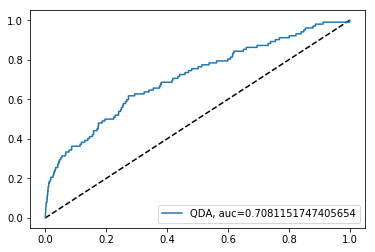

In [119]:
qda_proba = qda.predict_proba(x_t)[::,1]
fpr_qda, tpr_qda, _ = metrics.roc_curve(label_t,  qda_proba)
plt.plot([0, 1], [0, 1], 'k--', )
auc_qda = metrics.roc_auc_score(label_t, qda_proba)
plt.plot(fpr_qda,tpr_qda,label="QDA, auc="+str(auc_qda))
plt.legend(loc=4)
plt.show()


## KNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_tr, label_tr) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [121]:
knn_pred = knn.predict(x_t)

In [122]:
#데이터 검증
print("\n *Confusion Matrix* \n")
print(confusion_matrix(label_t, knn_pred))
print("\n *Classification Report* \n")
print(metrics.classification_report(label_t, knn_pred))

# 51 61


 *Confusion Matrix* 

[[89059 67847]
 [   39    63]]

 *Classification Report* 

             precision    recall  f1-score   support

          0       1.00      0.57      0.72    156906
          1       0.00      0.62      0.00       102

avg / total       1.00      0.57      0.72    157008



In [123]:
p = knn.predict_proba(x_t)

In [124]:
p

array([[0.6, 0.4],
       [0.6, 0.4],
       [0. , 1. ],
       ...,
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4]])

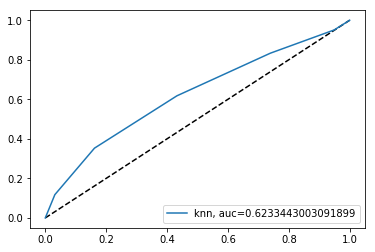

In [125]:
knn_proba = knn.predict_proba(x_t)[::,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(label_t,  knn_proba)
plt.plot([0, 1], [0, 1], 'k--')
auc_knn = metrics.roc_auc_score(label_t, knn_proba)
plt.plot(fpr_knn,tpr_knn,label="knn, auc="+str(auc_knn))
plt.legend(loc=4)
plt.show()


## LDA

In [140]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [141]:
lda = LDA()
lda.fit(x_tr, label_tr)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [142]:
lda_pred = lda.predict(x_t)

In [143]:
#데이터 검증
print("\n *Confusion Matrix* \n")
print(confusion_matrix(label_t, lda_pred))
print("\n *Classification Report* \n")
print(metrics.classification_report(label_t, lda_pred))

# 51 61


 *Confusion Matrix* 

[[108562  48344]
 [    42     60]]

 *Classification Report* 

             precision    recall  f1-score   support

          0       1.00      0.69      0.82    156906
          1       0.00      0.59      0.00       102

avg / total       1.00      0.69      0.82    157008



In [130]:
p = lda.predict_proba(x_t)

In [131]:
p

array([[0.15025793, 0.84974207],
       [0.27466838, 0.72533162],
       [0.30809304, 0.69190696],
       ...,
       [0.29173209, 0.70826791],
       [0.47272586, 0.52727414],
       [0.54045565, 0.45954435]])

In [132]:
p[3]

array([0.32016733, 0.67983267])

In [133]:
p[3][1]

0.6798326654998246

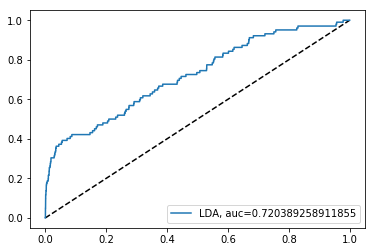

In [138]:
lda_proba = lda.predict_proba(x_t)[::,1]
fpr_lda, tpr_lda, _ = metrics.roc_curve(label_t,  lda_proba)
plt.plot([0, 1], [0, 1], 'k--', )
auc_lda = metrics.roc_auc_score(label_t, lda_proba)
plt.plot(fpr_lda,tpr_lda,label="LDA, auc="+str(auc_lda))
plt.legend(loc=4)
plt.show()


### 그래프

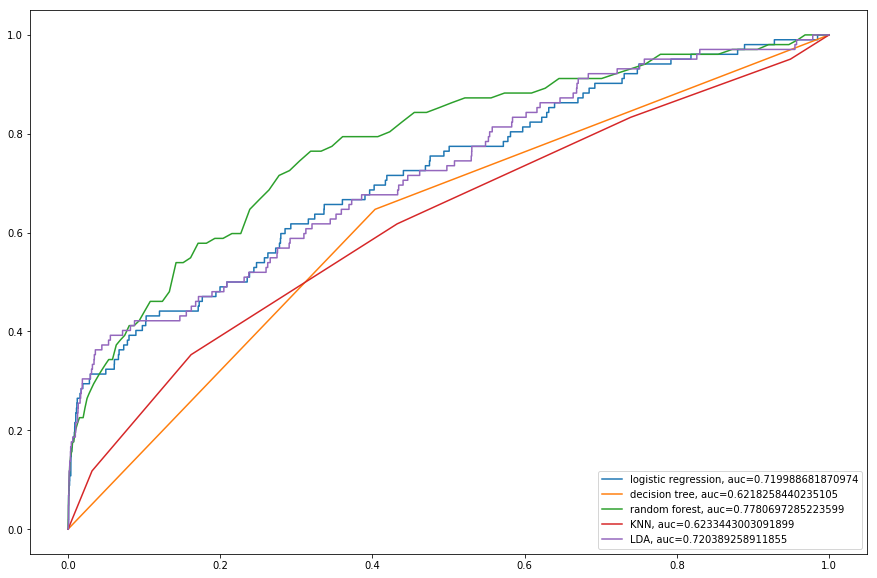

In [151]:
plt.figure(figsize=(15,10))
plt.plot(fpr_log,tpr_log,label="logistic regression, auc="+str(auc_log))
plt.plot(fpr_dtc,tpr_dtc,label="decision tree, auc="+str(auc_dtc))
plt.plot(fpr_rdc,tpr_rdc,label="random forest, auc="+str(auc_rdc))
plt.plot(fpr_knn,tpr_knn,label="KNN, auc="+str(auc_knn))
plt.plot(fpr_lda,tpr_lda,label="LDA, auc="+str(auc_lda))
plt.legend(loc=4)
plt.show()
